<a href="https://colab.research.google.com/github/ashnernovilla/Data-Science-Assesment/blob/master/Data_Science_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technical Data Task

## Import Library

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_white"

## Import Dataset and Get the 1st Five

In [16]:
df_raw = pd.read_parquet(r'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2016-02.parquet')

In [17]:
df_raw.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2016-02-01 00:11:39,2016-02-01 00:22:25,N,1,265,265,1,3.80,15.23,0.0,0.0,0.00,0.0,None,0.46,15.69,2,1.0,None
1,2,2016-02-01 00:44:47,2016-02-01 00:51:57,N,1,265,265,1,1.50,8.79,0.0,0.0,0.00,0.0,None,0.26,9.05,2,1.0,None
2,2,2016-02-01 00:10:55,2016-02-01 00:35:08,N,1,225,77,1,3.84,15.50,0.5,0.5,3.36,0.0,None,0.30,20.16,1,1.0,None
3,2,2016-02-01 00:36:25,2016-02-01 00:40:10,N,1,77,39,1,1.04,5.50,0.5,0.5,0.00,0.0,None,0.30,6.80,2,1.0,None
4,2,2016-02-01 00:06:28,2016-02-01 00:17:09,N,1,80,52,1,5.18,16.00,0.5,0.5,0.00,0.0,None,0.30,17.30,2,1.0,None


## 1.	Report the number of rows and columns that been loaded.

In [18]:
## Print the Number of Rows
print("Number of Rows: ", len(df_raw))
## Print the Number of Columns
print("Number of Columns: ", len(df_raw.columns))

Number of Rows:  1510722
Number of Columns:  20


## 2.	Visualise the trip distance by time of day in any way you see fit and report on any observations.

### 2.1 Visualise the trip distance by time of day.

In [101]:
# Visualise the trip distance by time of day in any way you see fit and report on any observations.
df_1 = df_raw.copy()

# Convert pickup datetime to datetime object
df_1['lpep_pickup_datetime'] = pd.to_datetime(df_1['lpep_pickup_datetime'])

# Extract hour from pickup datetime
df_1['pickup_hour'] = df_1['lpep_pickup_datetime'].dt.hour

# Group by pickup hour and calculate the average trip distance
hourly_trip_distance = df_1.groupby('pickup_hour')['trip_distance'].mean()
hourly_trip_distance_median = df_1.groupby('pickup_hour')['trip_distance'].median()


# Create the Plotly figure
fig = go.Figure()

# Add the trace for the line plot
fig.add_trace(go.Scatter(
    x=hourly_trip_distance.index,
    y=hourly_trip_distance.values,
    mode='lines+markers',
    name='Average Trip Distance',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8)
))

# Add the trace for the line plot
fig.add_trace(go.Scatter(
    x=hourly_trip_distance_median.index,
    y=hourly_trip_distance_median.values,
    mode='lines+markers',
    name='Median Trip Distance',
    line=dict(color='darkolivegreen', width=2),
    marker=dict(size=8)
))

# Customize layout
fig.update_layout(
    title='Trip Distance by Time of Day',
    xaxis_title='February Hour of Day',
    yaxis_title='Trip Distance (miles)',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(gridcolor='LightGray'),
    template='plotly_white'
)



# Show the interactive plot
fig.show()

# Observations:
# From the plot we can see if there are any patterns in trip distance based on the time of day.
# For example, it might be observe that trip distances are generally longer during certain hours (rush hours) or shorter during other hours.

# By Taking the median we are removing the possible outliers focusing on the 50th Percentile of the data.
# We can notice that the highest median is between 5 to 6 AM in the morning. As this is the rush hour - people going to work
# But we notice that median is around 2.8 Miles in distance.

### 2.2 Visualise the trip distance by day of the week.

In [21]:
import plotly.graph_objs as go
import numpy as np

# Create a copy of the dataframe
df_2 = df_1.copy()

# Extract the weekday name from the 'lpep_pickup_datetime' column
df_2['pickup_weekday'] = df_2['lpep_pickup_datetime'].dt.day_name()

# Define a custom ordering of weekdays, starting with Sunday
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Group by weekday and calculate the average trip distance
weekly_trip_distance = df_2.groupby('pickup_weekday')['trip_distance'].mean().reindex(weekday_order)

# Normalize the values to create a gradient color from lowest to highest.
# Note this is only for design but applicaple if we need to normalize our data.
# Min Max was used to normalize the data.
normalized_values = (weekly_trip_distance - weekly_trip_distance.min()) / (weekly_trip_distance.max() - weekly_trip_distance.min())

# Create the Plotly histogram (bar chart)
fig = go.Figure()

# Add the trace for the bar plot with gradient colors
fig.add_trace(go.Bar(
    x=weekly_trip_distance.index,
    y=weekly_trip_distance.values,
    name='Avg Trip Distance',
    marker=dict(
        color=normalized_values,  # Use the normalized values for the gradient
        colorscale='Greens',  # Color gradient from light blue to dark blue
        showscale=False  # Hide the color scale bar
    )
))

# Customize layout
fig.update_layout(
    title='Average Trip Distance by Day of Week (Gradient from Highest to Lowest)',
    xaxis_title='Day of Week',
    yaxis_title='Average Trip Distance (miles)',
    xaxis=dict(categoryorder='array', categoryarray=weekday_order),
    yaxis=dict(gridcolor='LightGray'),
    template='plotly_white'
)

# Show the interactive plot
fig.show()


# Observations:
# We can analyze the plot to see if there are any patterns in trip distance based on the day of the week.
# For example, you might observe that trip distances are generally longer during Sunday and Saturday, as well as Monday and Friday
# or shorter during other days (e.g., Tueday, Wednesday, and Thursday).


## 3.	The most popular pickup locations on weekdays vs weekend?

In [104]:
df_3 = df_2.copy()

# Define a function to categorize days as weekday or weekend
def categorize_day(day):
  if day in ['Saturday', 'Sunday']:
    return 'Weekend'
  else:
    return 'Weekday'

# Apply the function to create a new 'day_type' column
df_3['day_type'] = df_3['pickup_weekday'].map(categorize_day)

# Group by day type and pickup location, then count the number of trips
popular_pickup_locations = df_3.groupby(['day_type', 'PULocationID'])['PULocationID'].count().reset_index(name='trip_count')

# Find the most popular pickup locations for weekdays and weekends
weekday_popular = popular_pickup_locations[popular_pickup_locations['day_type'] == 'Weekday'].nlargest(10, 'trip_count')
weekend_popular = popular_pickup_locations[popular_pickup_locations['day_type'] == 'Weekend'].nlargest(10, 'trip_count')

# Find the most popular pickup locations for weekdays and weekends No Limits
weekday_popular_nolimits = popular_pickup_locations[popular_pickup_locations['day_type'] == 'Weekday']
weekend_popular_nolimits = popular_pickup_locations[popular_pickup_locations['day_type'] == 'Weekend']


print("Most Popular Pickup Locations on Weekdays:")
print(weekday_popular)

print("\nMost Popular Pickup Locations on Weekends:")
print(weekend_popular)


Most Popular Pickup Locations on Weekdays:
    day_type  PULocationID  trip_count
67   Weekday            75       56926
66   Weekday            74       53267
37   Weekday            41       53060
137  Weekday           166       45733
6    Weekday             7       44827
74   Weekday            82       37719
38   Weekday            42       36941
215  Weekday           255       35738
150  Weekday           181       35093
86   Weekday            97       31991

Most Popular Pickup Locations on Weekends:
    day_type  PULocationID  trip_count
433  Weekend           255       29380
259  Weekend            41       26256
228  Weekend             7       24650
287  Weekend            74       20695
295  Weekend            82       19720
370  Weekend           181       19662
260  Weekend            42       16518
434  Weekend           256       15870
329  Weekend           129       15324
288  Weekend            75       15202


In [105]:
# Create a treemap for weekday popular pickup locations
fig_weekday = px.treemap(weekday_popular_nolimits, path=['PULocationID'], values='trip_count',
                       title='Most Popular Pickup Locations on Weekdays')
fig_weekday.show()

# Create a treemap for weekend popular pickup locations
fig_weekend = px.treemap(weekend_popular_nolimits, path=['PULocationID'], values='trip_count',
                       title='Most Popular Pickup Locations on Weekends')
fig_weekend.show()


## 4. Model that forecast the number of trips per hour for the 12 hours following 12th February at 10:00AM.

### 4.1 Install the needed library

In [ ]:
!pip install pmdarima

### 4.2 Split the data from train and test.

In [24]:
# Build a model to forecast the number of trips per hour for the 12 hours following 12th February at 10:00AM.
# 1st Model is to use Auto Arima

# Import libraries
from pmdarima import auto_arima
from prophet import Prophet
from datetime import datetime, timedelta

# Prepare the data for forecasting
df_4 = df_3.copy()
df_4['lpep_pickup_datetime'] = pd.to_datetime(df_4['lpep_pickup_datetime'])
df_4['pickup_hour'] = df_4['lpep_pickup_datetime'].dt.floor('H')
hourly_trips = df_4.groupby('pickup_hour').agg({'pickup_hour' : 'count'}).rename(columns={'pickup_hour': 'num_trips'}).reset_index()

# Create a time series dataset for forecasting
ts_data = hourly_trips[['pickup_hour', 'num_trips']].rename(columns={'pickup_hour': 'ds', 'num_trips': 'y'})

# Split data into training and testing sets
train_data = ts_data[ts_data['ds'] < datetime(2016, 2, 12, 10, 0)]
test_data = ts_data[ts_data['ds'] >= datetime(2016, 2, 12, 10, 0)]


### 4.3 Checking if the data is stationary

In [25]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):

    dftest = adfuller(timeseries)
    print('ADF Statistic: %f' % dftest[0])
    print('p-value: %f' % dftest[1])
    print(dftest)


adf_test(train_data['y'])

# Our P-Value is 3.2852868897850326e-07 much less than 0.05 it means our data is stationary
# Our ADF test statistic (-5.868) is much lower than the our critical values
# Therefore, the time series is likely stationary, meaning it does not have a unit root and its properties do not change over time.

ADF Statistic: -5.868318
p-value: 0.000000
(-5.868318179554332, 3.2852868897850326e-07, 13, 260, {'1%': -3.4557539868570775, '5%': -2.8727214497041422, '10%': -2.572728476331361}, 3620.6070702929906)


In [26]:
# checking the data plots. We can see it is stationary but it has seasonality

fig = px.line(hourly_trips, x='pickup_hour', y='num_trips',  markers=True)
fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### 4.4 Checking the PACF Plot for Verification

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf

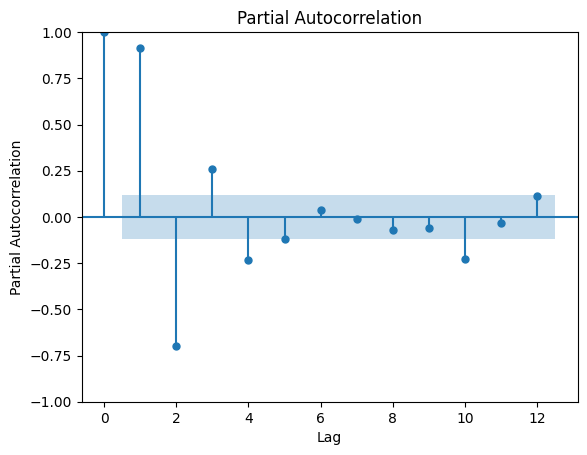

In [118]:
plot_pacf(train_data['y'], lags=12)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()

# We can see that the those who have significant impact based on lags of 12 is 1,2,3,4,10.
# Thou if I choose 10 as our parameter in AR it would have too much parameter.
# We want to take the lower our Number of Parameter. Our goal is to make it Simple as it can be.

### 4.5 Performing Auto ARIMA to find the best p, q, d values with the lowest AIC

In [19]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# The 'm' parameter in auto_arima represents the frequency of the seasonal component.
# m=12 suggests a yearly seasonality with 12 periods (months) in a year.
# m=24 suggests a yearly seasonality with 24 periods (hours) in a day.

# In general:
# - m=12 might be suitable if you expect a seasonal pattern with a yearly cycle (e.g., more trips in summer).
# - m=24 might be suitable if you expect a seasonal pattern with a daily cycle (e.g., more trips during rush hour).

# Comparing the AIC (Akaike Information Criterion) values of both models can help determine which model is a better fit.
# A lower AIC indicates a better model.

# Note:AIC = 2k - 2l  Where k = number of parameters and l = log likelihood

# Fit auto_arima function to  dataset
stepwise_fit = auto_arima(train_data['y'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 24,
                          seasonal = True,
                          D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise




Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[24] intercept   : AIC=inf, Time=22.46 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=3909.041, Time=0.26 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=3511.069, Time=14.97 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=3676.897, Time=8.07 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=3909.636, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=3519.032, Time=0.67 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=3497.134, Time=12.96 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=25.90 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.06 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=3872.835, Time=6.47 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=3419.099, Time=15.01 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=3438.898, Time=8.21 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=28.62 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=6.21 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   

### 4.6 Checking the Summary

In [20]:
summary = stepwise_fit.summary()

# Convert the summary to a string and split it by lines
summary_str = str(summary)
summary_lines = summary_str.splitlines()

filtered_summary = "\n".join([line for line in summary_lines if
                                   "inf" not in line
                              and 'HQIC' not in line
                              and 'Ljung-Box (L1) (Q):' not in line
                              and 'Prob(Q):'not in line
                              and 'Heteroskedasticity (H):' not in line
                              and 'Prob(H) (two-sided):' not in line])

# Print the filtered summary
print(filtered_summary)


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  274
Model:             SARIMAX(2, 0, 0)x(2, 1, 0, 24)   Log Likelihood               -1704.118
Date:                            Wed, 18 Sep 2024   AIC                           3418.237
Time:                                    16:07:16   BIC                           3435.844
                                            - 274                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4070      0.040     34.946      0.000       1.328       1.486
ar.L2         -0.5325      0.041    -12.993      0.000      -0.613      -0.452
ar.S.L24      -0.3815      0.048     -8.013    

### 4.7 Fitting the Model

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data['y'],
                order = (2, 0, 0),
                seasonal_order =(2, 1, 0, 24))

result = model.fit()

### 4.8 Plotting the Actual vs the Predicted

In [30]:
#ode : Predictions of ARIMA Model against the test set

start = len(train_data)
end =  start + len(test_data) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=test_data['ds'],
        y=test_data['y'],
        mode='lines',
        line=dict(color='navy', width=2.5),
        name='Actual'
    )
)
fig.add_trace(
    go.Scatter(
        x=test_data['ds'],
        y=predictions,
        mode='lines',
        line=dict(color='orange', width=1.5),
        name='Predicted',
    )
)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



## 5.0 Checking the Metrics and Improving the Results

### 5.1 Checking the Result Using MAPE and R2

In [31]:
from sklearn.metrics import  r2_score
# Compute R²
r2 = r2_score(test_data['y'], predictions)

def mean_absolute_percentage_error(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

# Compute MAPE
mape = mean_absolute_percentage_error(test_data['y'], predictions)

print(f"R-squared: {r2:.4f}")
print(f"MAPE: {mape:.2f}%")



## Based on the result we can say that the MAPE is 27.76% which falls into a Reasonable Forecast based on the criteria provided by
# Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and Practice (3rd ed.). OTexts.

## The model can still be improve. Let's use and advance model for this problem

R-squared: 0.4871
MAPE: 27.76%


### 5.2 Adding a new Model using XGB Regressor

In [61]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_percentage_error

# Prepare the data for XGBoost
X_train = pd.DataFrame({'hour': train_data['ds'].dt.hour,
                       'dayofweek': train_data['ds'].dt.dayofweek})
y_train = train_data['y']

X_test = pd.DataFrame({'hour': test_data['ds'].dt.hour,
                      'dayofweek': test_data['ds'].dt.dayofweek})
y_test = test_data['y']

# Create an XGBRegressor model
model_xgb = xgb.XGBRegressor(n_estimators=1000)

# Train the model with early stopping
model_xgb.fit(X_train, y_train, verbose=False)

# Make predictions
y_pred_xgb = model_xgb.predict(X_test)

### 5.3 Checking the Result of XGB Regressor Using MAPE and R2

In [63]:
# Compute R²
r2_xgb = r2_score(y_test, y_pred_xgb)

# Compute MAPE
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost R-squared: {r2_xgb:.4f}")
print(f"MAPE: {mape_xgb:.2f}%")


## Find the best attributes in the Model
# pd.DataFrame(
#   data = model_xgb.feature_importances_,
#   index = model_xgb.feature_names_in_,
#   columns=['importance']
# ).sort_values(by='importance', ascending=False)


# Plot the actual vs predicted values for XGBoost
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=train_data['ds'],
        y=y_train,
        mode='lines',
        line=dict(color='green', width=2.5),
        name='Historical Data'
    )
)

fig.add_trace(
    go.Scatter(
        x=test_data['ds'],
        y=y_test,
        mode='lines',
        line=dict(color='navy', width=2.5),
        name='Actual'
    )
)
fig.add_trace(
    go.Scatter(
        x=test_data['ds'],
        y=y_pred_xgb,
        mode='lines',
        line=dict(color='orange', width=1.5),
        name='Predicted (XGBoost)',
    )
)
fig.show()


## Based on the result we can say that the our MAPE has improved from 27.76% to 0.10% which falls into a Highly Accurate Forecast based on the criteria provided by
# Hyndman, R. J., & Athanasopoulos, G. (2021). Forecasting: Principles and Practice (3rd ed.). OTexts.

# Our R2 also improved from 0.4871 to 0.9232


XGBoost R-squared: 0.9232
MAPE: 0.10%


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



,importance
hour,0.78754
dayofweek,0.21246


### 5.4 Save the Model

In [ ]:
## Save the Model

import pickle

# Save the trained XGBoost model to a file
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(model_xgb, f)


## 6.0 Additional Findings and Insights

### 6.1 Find the Average Trip Duration and the Median Duration of Trip to Determine the traffic

In [67]:
# Create a copy of the dataframe
df_duration = df_4.copy()

# Convert pickup and dropoff datetime columns to datetime objects
df_duration['lpep_pickup_datetime'] = pd.to_datetime(df_duration['lpep_pickup_datetime'])
df_duration['lpep_dropoff_datetime'] = pd.to_datetime(df_duration['lpep_dropoff_datetime'])

# Calculate trip duration in minutes
df_duration['trip_duration_minutes'] = (df_duration['lpep_dropoff_datetime'] - df_duration['lpep_pickup_datetime']).dt.total_seconds() / 60

# Print the first few rows to verify the calculation
print(df_duration[['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'trip_duration_minutes']].head())

# You can now analyze the trip duration data, such as calculating the average trip duration,
# finding the longest and shortest trips, or visualizing the distribution of trip durations.


  lpep_pickup_datetime lpep_dropoff_datetime  trip_duration_minutes
0  2016-02-01 00:11:39   2016-02-01 00:22:25              10.766667
1  2016-02-01 00:44:47   2016-02-01 00:51:57               7.166667
2  2016-02-01 00:10:55   2016-02-01 00:35:08              24.216667
3  2016-02-01 00:36:25   2016-02-01 00:40:10               3.750000
4  2016-02-01 00:06:28   2016-02-01 00:17:09              10.683333


,pickup_hour
0,0
1,0
2,0
3,0
4,0
...,...
1510717,23
1510718,23
1510719,23
1510720,23


In [122]:
# Plot the Average Duration and the Median Duration of Trip to Determine the traffic.

df_duration['pickup_hour'] = df_duration['pickup_hour'].dt.hour

# Group by pickup hour and calculate the average trip duration
hourly_trip_duration_mean = df_duration.groupby('pickup_hour')['trip_duration_minutes'].mean()
hourly_trip_duration_median = df_duration.groupby('pickup_hour')['trip_duration_minutes'].median()

# Create the Plotly figure
fig = go.Figure()

# Add the trace for the line plot
fig.add_trace(go.Scatter(
    x=hourly_trip_duration_mean.index,
    y=hourly_trip_duration_mean.values,
    mode='lines+markers',
    name='Avg Trip Duration',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=hourly_trip_duration_median.index,
    y=hourly_trip_duration_median.values,
    mode='lines+markers',
    name='Median Trip Duration',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))


# Customize layout
fig.update_layout(
    title='Average and Median Trip Duration by Time of Day',
    xaxis_title='February Hour of Day',
    yaxis_title='Average Trip Duration (minutes)',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(gridcolor='LightGray'),
    template='plotly_white'
)

# Show the interactive plot
fig.show()

# Create a copy of the dataframe
df_day_duration = df_duration.copy()

# Extract the weekday name from the 'lpep_pickup_datetime' column
df_day_duration['pickup_weekday'] = df_day_duration['lpep_pickup_datetime'].dt.day_name()

# Group by weekday and calculate the average trip duration
daily_trip_duration_mean = df_day_duration.groupby('pickup_weekday')['trip_duration_minutes'].mean()
daily_trip_duration_median = df_day_duration.groupby('pickup_weekday')['trip_duration_minutes'].median()

# Define a custom ordering of weekdays, starting with Sunday
weekday_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Reorder the data based on the specified order
daily_trip_duration_mean = daily_trip_duration_mean.reindex(weekday_order)
daily_trip_duration_median = daily_trip_duration_median.reindex(weekday_order)

# Create the Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=daily_trip_duration_mean.index,
    y=daily_trip_duration_mean.values,
    name='Avg Trip Duration',
    text=daily_trip_duration_mean.index,
    hovertemplate='Day: %{text}<br>Average Duration: %{y:.2f} minutes',
    marker=dict(color='royalblue')
))

fig.add_trace(go.Bar(
    x=daily_trip_duration_median.index,
    y=daily_trip_duration_median.values,
    name='Median Trip Duration',
    text=daily_trip_duration_median.index,
    hovertemplate='Day: %{text}<br>Median Duration: %{y:.2f} minutes',
    marker=dict(color='red')
))


# Customize layout
fig.update_layout(
    title='Average and Median Trip Duration by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Trip Duration (minutes)',
    xaxis=dict(categoryorder='array', categoryarray=weekday_order),
    yaxis=dict(gridcolor='LightGray'),
    barmode='group',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


## From the plot below we can observe that most of the longer trip duration are during Sunday, Saturday, and Friday. It means that during this days there are observable traffics on the road.

### 6.2 Revenue Analysis Find the aggregate fare amounts by different factors such as location, time, or day of the week.


In [92]:
# prompt: Revenue Analysis Find the aggregate fare amounts by different factors such as time of the day by mean and median

# Create a copy of the dataframe
df_revenue = df_4.copy()

df_revenue['pickup_hour'] = df_revenue['lpep_pickup_datetime'].dt.hour

# Group by pickup hour and calculate the average fare amount
hourly_fare_amount_mean = df_revenue.groupby('pickup_hour')['fare_amount'].mean()
hourly_fare_amount_median = df_revenue.groupby('pickup_hour')['fare_amount'].median()

# Create the Plotly figure
fig = go.Figure()

# Add the trace for the line plot
fig.add_trace(go.Scatter(
    x=hourly_fare_amount_mean.index,
    y=hourly_fare_amount_mean.values,
    mode='lines+markers',
    name='Avg Fare Amount',
    line=dict(color='royalblue', width=2),
    marker=dict(size=8)
))

fig.add_trace(go.Scatter(
    x=hourly_fare_amount_median.index,
    y=hourly_fare_amount_median.values,
    mode='lines+markers',
    name='Median Fare Amount',
    line=dict(color='red', width=2),
    marker=dict(size=8)
))


# Customize layout
fig.update_layout(
    title='Average and Median Fare Amount by Time of Day',
    xaxis_title='February Hour of Day',
    yaxis_title='Fare Amount ($)',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(gridcolor='LightGray'),
    template='plotly_white'
)

# Show the interactive plot
fig.show()


# Group by pickup daily and calculate the average fees amount and median fees amount
weekly_fare_amount_mean = df_revenue.groupby('pickup_weekday')['fare_amount'].mean()
weekly_fare_amount_median = df_revenue.groupby('pickup_weekday')['fare_amount'].median()

# Create the Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(
    x=weekly_fare_amount_mean.index,
    y=weekly_fare_amount_mean.values,
    name='Avg Fees Amount',
    marker=dict(color='royalblue')
))

fig.add_trace(go.Bar(
    x=weekly_fare_amount_median.index,
    y=weekly_fare_amount_median.values,
    name='Median Fees Amount',
    marker=dict(color='red')
))


# Customize layout
fig.update_layout(
    title='Average and Median Fees Amount by Day of Week',
    xaxis_title='Day of Week',
    yaxis_title='Fees Amount $',
    xaxis=dict(categoryorder='array', categoryarray=weekday_order),
    yaxis=dict(gridcolor='LightGray'),
    barmode='group',
    template='plotly_white'
)

# Show the interactive plot
fig.show()


## On the image below we can observe that the fee amount are higher during the rush hours in the morning. To specific its around 5 ~ 6 AM in the morning.

## It can also be observed that the fees are higher during Friday, Saturday, and Sunday.

# Media Insight Task

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


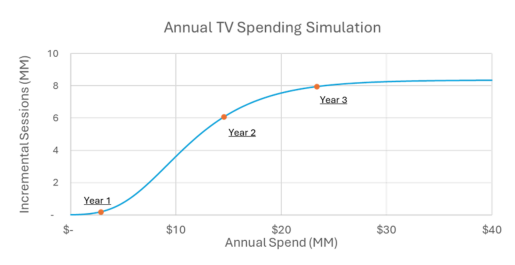

In [116]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/content/drive/MyDrive/MMM_Task.png')
plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()


## 1. In what year was the modelled TV spending the most efficient according to this curve?

In [117]:
'''
For me the efficiency of TV spending is best determine by the steepness of the curve, which indicates the incremental sessions per dollar spend.
In the graph, the steepest slope occurs in the range of $0 to $20 million, then the curve flattens.
Therefore, the modelled TV spending was most efficient at around $10–20 million which is Year 2, where the incremental gain in sessions per dollar spent was at its peak.
'''

'\nFor me the efficiency of TV spending is best determine by the steepness of the curve, which indicates the incremental sessions per dollar spend. \nIn the graph, the steepest slope occurs in the range of $0 to $20 million, then the curve flattens.\nTherefore, the modelled TV spending was most efficient at around $10–20 million which is Year 2, where the incremental gain in sessions per dollar spent was at its peak.\n'

## 2. What are some things a planner should consider when using this curve to recommend channel spend in year 4 onward?


In [ ]:
'''
Firstly, we need to consider the Diminishing Returns, because beyond $20M, the curve flattens, indicating a possible diminishing returns on investment.
It means that any additional spending results in smaller incremental gains in sessions.

Secondly, we need to consider Budget Optimization, as additional spend yields fewer sessions, it is best to allocate
excess budget to other channels or activities with higher potential incremental gains.

Thirdly, we need to consider Cross-Channel. As TV approaches saturation, it would be more reasonable to evaluate the effectiveness of
other channels such as web / application advertisements, social media, or etc. to maximize the overall campaign impact.

'''

# The Link for the Google Colab Notebook: https://colab.research.google.com/drive/12SO7R58aSayoHqCg3olReTUvTW-V6zKM?usp=sharing

